In [869]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shapereader
import xarray as XR
import metpy
from metpy.units import units
import metpy.calc as mpcalc
#from mpl_toolkits.basemap import cm
import sys # to get argv
import os
import warnings
import pandas as pd
from pandas import Series, DataFrame
from pathlib import Path

warnings.filterwarnings('ignore')

In [870]:
#---読み込むデータの設定-------
#argvs = sys.argv
#nc =  argvs[1] 
#nc = '../data/lfm/4v-lfm_lfmkyushu_2021-07-09_15utc.nc'
ncdir = '/Users/katon/Documents/NIED/SIP2/210924_SIP10月の評価会に向けての解析/data/4v-lfm/lfmkyushu/2021/07/09/'
it = 0    # 時刻スライス(0:解析値, >=1:予測値)
#it = 1    # 時刻スライス(0:解析値, >=1:予測値)
#x = 129.789176; y = 31.778707; lidar = "Ko" # 下甑島WVL
x = 129.752334; y = 32.576747; lidar = "Na" # 野母崎WVL
##---水蒸気ライダー
#`echo 129.752334 32.576747 | #{gmt_path}/psxy -Jm#{jm} -R#{rangeik} -SA0.4 -W5/red  -K -O >> #{ps}` # 野母崎
#`echo 129.789176 31.778707 | #{gmt_path}/psxy -Jm#{jm} -R#{rangeik} -SA0.4 -W5/red  -K -O >> #{ps}` # 下甑島

zmin = 0; zmax = 10000 # 可視化範囲

In [871]:
#--- set parameters---------------------------------------
#time = pd.date_range('202107092200', '202107100000', freq='15T')
#time = pd.date_range('202107092300', '202107100100', freq='15T')
#time = pd.date_range('202107091200', '202107101200', freq='15T')
time = pd.date_range('202107091700', '202107100300', freq='60T') # for paper
#time = pd.date_range('202107092345', '202107100000', freq='15T')
rmiss = np.nan
dt = pd.Timedelta(minutes=60/2.0)
time


DatetimeIndex(['2021-07-09 17:00:00', '2021-07-09 18:00:00',
               '2021-07-09 19:00:00', '2021-07-09 20:00:00',
               '2021-07-09 21:00:00', '2021-07-09 22:00:00',
               '2021-07-09 23:00:00', '2021-07-10 00:00:00',
               '2021-07-10 01:00:00', '2021-07-10 02:00:00',
               '2021-07-10 03:00:00'],
              dtype='datetime64[ns]', freq='60T')

In [872]:
#---read data by pandas------------------------
dlist = []
keys = []
for t in time:
    t = t -  pd.Timedelta(hours=9)
    ymdh  = t.strftime('%Y/%m/%d/%H/')
    ymdhm = t.strftime('%y%m%d%H%M')
    tt = t.strftime('%Y-%m-%d_%H')
    #f = '../data/MRI_VAPOR/2021/07/09/23/Ko2107092345mgd.txt'
    # 4v-lfm_lfmkyushu_2021-07-09_15utc.nc
    f = ncdir + '4v-lfm_lfmkyushu_' + tt + 'utc.nc'
#    print(f)
    t2 = t + dt
    keys.append(t2)
    
#    is_file = os.path.isfile(f)
#    print(is_file)
    if is_file:
        print(f"{f} exists and is a file.")
        #--- データの読み込み------------------
        xr0  = XR.open_dataset(f).isel(TIME=it)
#        xr = xr0.sel(LON=x, method='nearest').sel(LAT=y, method='nearest')
        dlist.append(xr0)
#    else:
        # 読み込むファイルのうち一番最初のファイルは存在しているに場合のみ対応している。
#        df1 = df0.copy()
#        df1[:] = rmiss # ファイルが存在しなければ、-999.90を代入する
#        dlist.append(df1) 
#        print(f"{f} does not exiest or is not a file.")
#    print(t2)    

xr = XR.concat(dlist, dim="TIME") # xarray DataSetを時間軸方向に結合
t2 = xr["TIME"] + pd.Timedelta(hours=9) # UTC => JST 
xr["TIME"] = t2 # UTC => JST

#--- データの読み込み------------------
#xr  = XR.open_dataset(nc).sel(LON=slice(xmin,xmax)).sel(LAT=slice(ymin,ymax))
#xr  = XR.open_mfdataset(ncdir+"*", parallel=True)
#xr = xr0.sel(LON=x, method='nearest').sel(LAT=y, method='nearest')
#xr["RH"].sel(LON=x, method='nearest').sel(LAT=y, method='nearest').transpose("LEV", "TIME").plot.contourf(yincrease=False)#,yscale="log")

/Users/katon/Documents/NIED/SIP2/210924_SIP10月の評価会に向けての解析/data/4v-lfm/lfmkyushu/2021/07/09/4v-lfm_lfmkyushu_2021-07-09_08utc.nc exists and is a file.
/Users/katon/Documents/NIED/SIP2/210924_SIP10月の評価会に向けての解析/data/4v-lfm/lfmkyushu/2021/07/09/4v-lfm_lfmkyushu_2021-07-09_09utc.nc exists and is a file.
/Users/katon/Documents/NIED/SIP2/210924_SIP10月の評価会に向けての解析/data/4v-lfm/lfmkyushu/2021/07/09/4v-lfm_lfmkyushu_2021-07-09_10utc.nc exists and is a file.
/Users/katon/Documents/NIED/SIP2/210924_SIP10月の評価会に向けての解析/data/4v-lfm/lfmkyushu/2021/07/09/4v-lfm_lfmkyushu_2021-07-09_11utc.nc exists and is a file.
/Users/katon/Documents/NIED/SIP2/210924_SIP10月の評価会に向けての解析/data/4v-lfm/lfmkyushu/2021/07/09/4v-lfm_lfmkyushu_2021-07-09_12utc.nc exists and is a file.
/Users/katon/Documents/NIED/SIP2/210924_SIP10月の評価会に向けての解析/data/4v-lfm/lfmkyushu/2021/07/09/4v-lfm_lfmkyushu_2021-07-09_13utc.nc exists and is a file.
/Users/katon/Documents/NIED/SIP2/210924_SIP10月の評価会に向けての解析/data/4v-lfm/lfmkyushu/2021/07/09/4v-lfm_lf

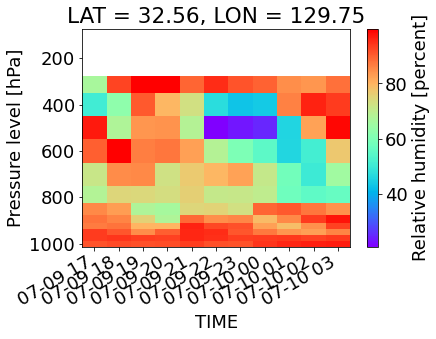

In [873]:
# 確認描画
xr2  = xr["RH"].sel(LON=x, method='nearest').sel(LAT=y, method='nearest').transpose("LEV", "TIME")
xr2.plot(yincrease=False, cmap='rainbow')#,yscale="log")

In [877]:
rh = xr["RH"]
u  = xr["U"]
v  = xr["V"]
T  = xr["T"]
Z  = xr["Z"]

lat = xr["LAT"]
lon = xr["LON"]
time = xr["TIME"]
P  = xr["LEV"]
P

<xarray.DataArray 'LEV' (LEV: 16)>
array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  700.,  600.,  500.,
        400.,  300.,  250.,  200.,  150.,  100.])
Coordinates:
  * LEV      (LEV) float64 1e+03 975.0 950.0 925.0 ... 250.0 200.0 150.0 100.0
Attributes:
    long_name:  Pressure level
    units:      hPa
    positive:   down

In [875]:
#---水蒸気混合比の計算(Tとpから計算)-------------------
rh0 = rh#.isel(TIME=it)
T0  = T#.isel(TIME=it)
Z0  = Z#.isel(TIME=it)
#tp = lev * units.hPa
tp = P
qvs = (mpcalc.saturation_mixing_ratio(tp, T0) * 1000).metpy.dequantify().rename("QVS").assign_attrs(units="g/kg", long_name="Saturation mixising ratio")
qv = (qvs * rh0 / 100.0).rename("QV").assign_attrs(long_name="Water vapor mixising ratio")
qv = qv.transpose("TIME","LEV", "LAT", "LON") # metpyを介したことで次元のTIMEとLEVの順番が他の変数と変わってしまったので、他の変数と合わせる

In [920]:
PP = T.copy()
nt, nz, ny, nx = PP.shape

PPP = T.copy().data
ppp = P.data
# narray で loop すると一瞬で終わる
for l in range(0,nt):
    for j in range(0,ny):
        for i in range(0,nx):
            PPP[l,:,j,i] = ppp
PPP
PP[:] = PPP

# 以下のようにxarrayのままloopすると、非常に遅い(30秒くらいかかる)
#for l in range(0,nt):
#    for j in range(0,ny):
#        for i in range(0,nx):
#            PP[l,:,j,i] = P[:]
#PP

In [916]:
PP = PP.rename("P").assign_attrs(units="hPa", long_name="Pressure", positive='down')
PP

<xarray.DataArray 'P' (TIME: 11, LEV: 16, LAT: 126, LON: 101)>
array([[[[1000., 1000., 1000., ..., 1000., 1000., 1000.],
         [1000., 1000., 1000., ..., 1000., 1000., 1000.],
         [1000., 1000., 1000., ..., 1000., 1000., 1000.],
         ...,
         [1000., 1000., 1000., ..., 1000., 1000., 1000.],
         [1000., 1000., 1000., ..., 1000., 1000., 1000.],
         [1000., 1000., 1000., ..., 1000., 1000., 1000.]],

        [[ 975.,  975.,  975., ...,  975.,  975.,  975.],
         [ 975.,  975.,  975., ...,  975.,  975.,  975.],
         [ 975.,  975.,  975., ...,  975.,  975.,  975.],
         ...,
         [ 975.,  975.,  975., ...,  975.,  975.,  975.],
         [ 975.,  975.,  975., ...,  975.,  975.,  975.],
         [ 975.,  975.,  975., ...,  975.,  975.,  975.]],

        [[ 950.,  950.,  950., ...,  950.,  950.,  950.],
         [ 950.,  950.,  950., ...,  950.,  950.,  950.],
         [ 950.,  950.,  950., ...,  950.,  950.,  950.],
         ...,
...
         ...,
         [ 200.,  200.,  200., ...,  200.,  200.,  200.],
         [ 200.,  200.,  200., ...,  200.,  200.,  200.],
         [ 200.,  200.,  200., ...,  200.,  200.,  200.]],

        [[ 150.,  150.,  150., ...,  150.,  150.,  150.],
         [ 150.,  150.,  150., ...,  150.,  150.,  150.],
         [ 150.,  150.,  150., ...,  150.,  150.,  150.],
         ...,
         [ 150.,  150.,  150., ...,  150.,  150.,  150.],
         [ 150.,  150.,  150., ...,  150.,  150.,  150.],
         [ 150.,  150.,  150., ...,  150.,  150.,  150.]],

        [[ 100.,  100.,  100., ...,  100.,  100.,  100.],
         [ 100.,  100.,  100., ...,  100.,  100.,  100.],
         [ 100.,  100.,  100., ...,  100.,  100.,  100.],
         ...,
         [ 100.,  100.,  100., ...,  100.,  100.,  100.],
         [ 100.,  100.,  100., ...,  100.,  100.,  100.],
         [ 100.,  100.,  100., ...,  100.,  100.,  100.]]]], dtype=float32)
Coordinates:
  * TIME     (TIME) datetime64[ns] 2021-07-09T17:00:00 ... 2021-07-10T03:00:00
  * LEV      (LEV) float64 1e+03 975.0 950.0 925.0 ... 250.0 200.0 150.0 100.0
  * LAT      (LAT) float64 30.0 30.04 30.08 30.12 ... 34.88 34.92 34.96 35.0
  * LON      (LON) float64 128.0 128.1 128.1 128.2 ... 132.8 132.9 132.9 133.0
Attributes:
    long_name:  Pressure
    units:      hPa
    positive:   down

In [917]:
#---指定したZ座標に補間する------------------------
# xarray.Dataset.assign_coords
# https://xarray.pydata.org/en/stable/generated/xarray.Dataset.assign_coords.html
#qv2 = qv.assign_coords(LEV=("LEV", Z0.data)) # Zが1次元の場合のみ適用可能

# Interpolating data
# https://docs.xarray.dev/en/stable/user-guide/interpolation.html
z0 =  [50, 100, 200, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 
       7000, 8000, 9000, 100000, 110000, 120000, 130000, 140000, 150000]
z0 =  [  100,  200,  300,  400, 500,   600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000,
        2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000]
       
#z0 =  [500]
z1 = np.array(z0, dtype=float)
zz = XR.DataArray(z1, coords=[z1], dims=["LEV"]).assign_attrs(units="m", long_name="Height")
#zz = XR.DataArray(z1, coords=[z1/1000.0], dims=["LEV"]).assign_attrs(units="km", long_name="Height")



from metpy.interpolate import interpolate_1d

#---鉛直補間-----------------------------------------------------------------
rh_Z0 = interpolate_1d(zz, Z.metpy.quantify(), rh.metpy.quantify(), axis=1)
qv_Z0 = interpolate_1d(zz, Z.metpy.quantify(), qv.metpy.quantify(), axis=1)
u_Z0  = interpolate_1d(zz, Z.metpy.quantify(),  u.metpy.quantify(), axis=1)
v_Z0  = interpolate_1d(zz, Z.metpy.quantify(),  v.metpy.quantify(), axis=1)
T_Z0  = interpolate_1d(zz, Z.metpy.quantify(),  T.metpy.quantify(), axis=1)
P_Z0  = interpolate_1d(zz, Z.metpy.quantify(),  PP.metpy.quantify(), axis=1)


# xarrya化
rh_Z = XR.DataArray(rh_Z0, coords=[time, zz, lat, lon], dims=["TIME", "LEV", "LAT", "LON"]).metpy.dequantify().rename("RH").assign_attrs(units="%",    long_name="Relative humidity")
qv_Z = XR.DataArray(qv_Z0, coords=[time, zz, lat, lon], dims=["TIME", "LEV", "LAT", "LON"]).metpy.dequantify().rename("QV").assign_attrs(units="g/kg", long_name="Water vapor mixising ratio")
u_Z  = XR.DataArray(u_Z0,  coords=[time, zz, lat, lon], dims=["TIME", "LEV", "LAT", "LON"]).metpy.dequantify().rename("U").assign_attrs(units="m/s",   long_name="Westerly wind speed")
v_Z  = XR.DataArray(v_Z0,  coords=[time, zz, lat, lon], dims=["TIME", "LEV", "LAT", "LON"]).metpy.dequantify().rename("V").assign_attrs(units="m/s",   long_name="Southerly wind speed")
T_Z  = XR.DataArray(T_Z0,  coords=[time, zz, lat, lon], dims=["TIME", "LEV", "LAT", "LON"]).metpy.dequantify().rename("T").assign_attrs(units="K",     long_name="Temperature")

P_Z  = XR.DataArray(P_Z0,  coords=[time, zz, lat, lon], dims=["TIME", "LEV", "LAT", "LON"]).metpy.dequantify().rename("P").assign_attrs(units="hPa",     long_name="Pressure", positive='down')


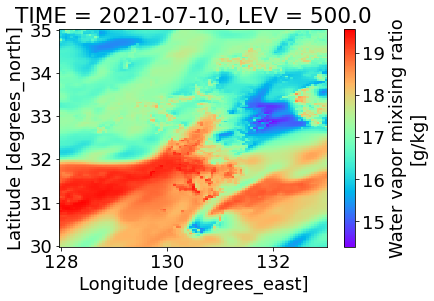

In [918]:
# 可視化
qv_Z.sel(LEV=500).sel(TIME="2021-07-10T00").plot(cmap='rainbow')#,yscale="log")

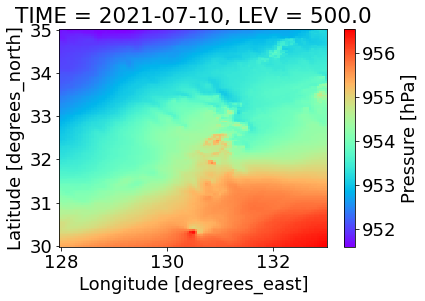

In [921]:
# 可視化
P_Z.sel(LEV=500).sel(TIME="2021-07-10T00").plot(cmap='rainbow')#,yscale="log")

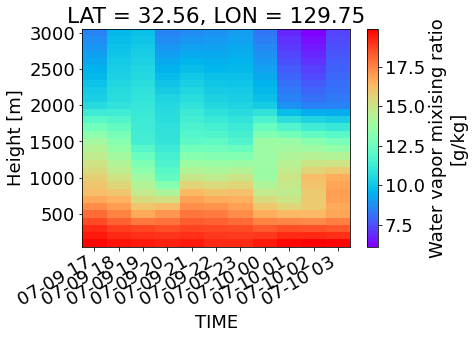

In [ ]:
# 可視化
qv_Z.sel(LON=x, method='nearest').sel(LAT=y, method='nearest').sel(LEV=slice(zmin,zmax)).transpose("LEV", "TIME").plot(cmap='rainbow')#,yscale="log")

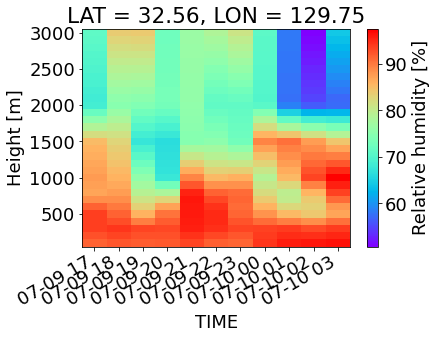

In [ ]:
rh_Z.sel(LON=x, method='nearest').sel(LAT=y, method='nearest').sel(LEV=slice(zmin,zmax)).transpose("LEV", "TIME").plot(cmap='rainbow')#,yscale="log")

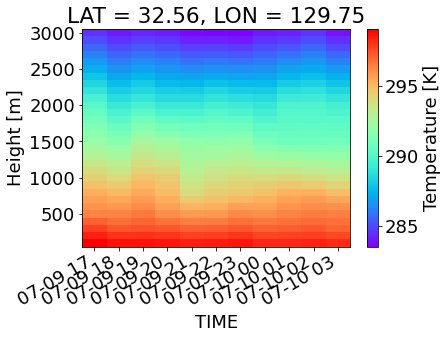

In [ ]:
T_Z.sel(LON=x, method='nearest').sel(LAT=y, method='nearest').sel(LEV=slice(zmin,zmax)).transpose("LEV", "TIME").plot(cmap='rainbow')#,yscale="log")

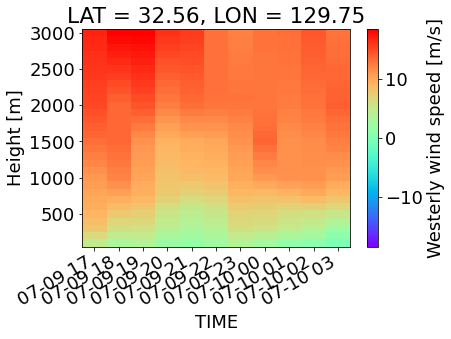

In [ ]:
u_Z.sel(LON=x, method='nearest').sel(LAT=y, method='nearest').sel(LEV=slice(zmin,zmax)).transpose("LEV", "TIME").plot(cmap='rainbow')#,yscale="log")

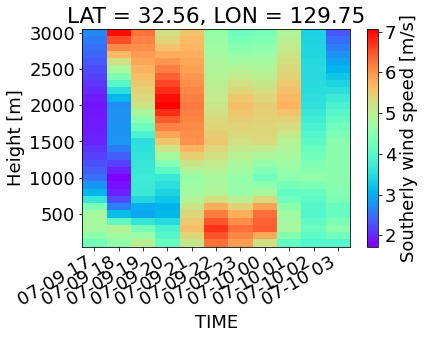

In [ ]:
v_Z.sel(LON=x, method='nearest').sel(LAT=y, method='nearest').sel(LEV=slice(zmin,zmax)).transpose("LEV", "TIME").plot(cmap='rainbow')#,yscale="log")

In [ ]:
# netcdf で出力

da = XR.merge([rh_Z, qv_Z, u_Z, v_Z, T_Z])
zkm = XR.DataArray(z1/1000.0, coords=[z1/1000.0], dims=["LEV"]).assign_attrs(units="km", long_name="Height")
da["LEV"] = zkm
da.to_netcdf("a.nc")

In [ ]:
#qv2 = qv_Z.sel(LON=x, method='nearest').sel(LAT=y, method='nearest')
qv2 = da["QV"].sel(LON=x, method='nearest').sel(LAT=y, method='nearest')
#qv2.to_netcdf("lfm_"+lidar+".nc")
qv2.to_netcdf("lfm_"+lidar+"_FT"+str(it)+".nc")

fig_4v-lmf_multi_qv_z.png


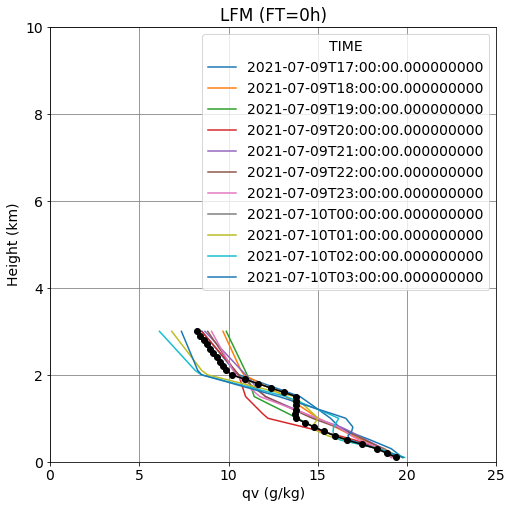

In [ ]:
#---図の設定-------------
fs = 14
plt.rcParams["font.size"]   = fs
#plt.rcParams["font.family"] = "fontname"
zmin = 0; zmax = 10
#---プロット領域の作成-----------
#fig = plt.figure()
#fig = plt.figure(figsize=(4,6))
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

#---lineを描く-------------------
# ax を使わない場合
#qv_cut.plot.line(y="LEV", aspect=0.75, size=8, color='black', marker='o')

# ax を使う場合
#  * ax を定義しておけば、軸が異なるxarrayでも適切にプロットできる
qv2.sel(LEV=slice(zmin, zmax)).plot.line(ax=ax, y="LEV")
#qv2.isel(TIME=6).plot.line(ax=ax, y="LEV", color='black', marker='o')
qv2.sel(TIME="2021-07-10T00").plot.line(ax=ax, y="LEV", color='black', marker='o')
#qv3.sel(LEV=slice(zmin, zmax)).plot.line(ax=ax, y="LEV", color='r', marker='x')

plt.title("LFM (FT="+str(it)+"h)")
plt.ylabel("Height (km)")
plt.xlabel("qv (g/kg)")
plt.grid(which='major',color='gray',linestyle='-')
ax.set_xlim([0,25])
ax.set_ylim([zmin,zmax])

#------------------------------------
# 図のファイルへの書き出し
#from pathlib import Path
#exe = Path().resolve().split(".")[0] #.replace("draw", "")
#exe = os.path.basename(__file__).split(".")[0] #.replace("draw", "")
fig_name = "fig_4v-lmf_multi_qv_z.png"
#fig_name = "fig_" + exe + ".png"
print(fig_name)
plt.savefig(fig_name, dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#qv2

fig_4v-lfm_multi_qv_z-t.png


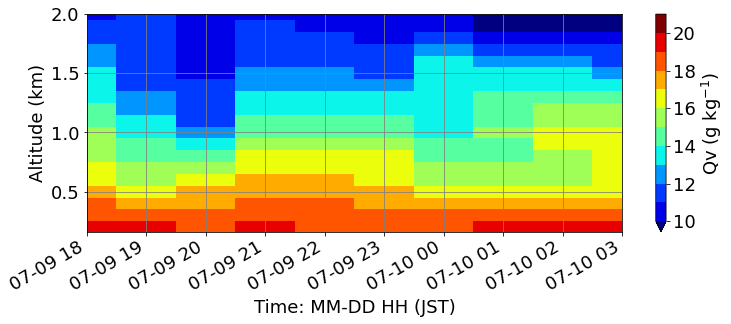

In [ ]:
#---図の設定-------------
fs = 18
plt.rcParams["font.size"]   = fs
#plt.rcParams["font.family"] = "fontname"
cmap = 'jet'

#---プロット領域の作成-----------
xx=12; yy=4
fig = plt.figure(figsize=(xx,yy))
ax = fig.add_subplot(1, 1, 1)

#---シェードを描く----------------------
vmin = 10; vmax = 20; levels = vmax - vmin + 1
vmin = 10; vmax = 21; levels = vmax - vmin + 1

#label = 'Water vapor mixing ratio (g kg$^{-1}$)'
label = 'Qv (g kg$^{-1}$)'
qv2.transpose("LEV", "TIME").plot(ax=ax,vmin=vmin, vmax=vmax, cmap=cmap, levels=levels,cbar_kwargs={'label':label})

#vmin2 = 0; vmax2 = 5
#np.log10(PZ).transpose("LEV", "TIME").plot(ax=ax,vmin=vmin2, vmax=vmax2, cmap=cmap, levels=levels)

#----タイトル・ラベル等の設定
#plt.title("WVL ("+lidar+")")
plt.title("")
plt.ylabel("Altitude (km)")
plt.xlabel("Time: MM-DD HH (JST)")
plt.grid(which='major',color='gray',linestyle='-')

#----可視化範囲を陽に設定
t1 = "2021-07-09T1800"; t2 = "2021-07-10T0300"
tt1 = pd.to_datetime(t1)
tt2 = pd.to_datetime(t2)
ax.set_xlim([tt1,tt2])
zmin = 0.1625; zmax = 2
#zmin = 0; zmax = 2
ax.set_ylim([zmin,zmax])

#------------------------------------
# 図のファイルへの書き出し
#from pathlib import Path
#exe = Path().resolve().split(".")[0] #.replace("draw", "")
#exe = os.path.basename(__file__).split(".")[0] #.replace("draw", "")
fig_name = "fig_4v-lfm_multi_qv_z-t.png"
#fig_name = "fig_" + exe + ".png"
print(fig_name)
plt.savefig(fig_name, dpi=300, bbox_inches='tight')
plt.show()